In [ ]:
from numpy import sqrt, rint, zeros, random, zeros, ones

In [ ]:
N=10

In [ ]:
rx=zeros(N)

In [ ]:
rx=random.normal(0.5, 2, N)

In [ ]:
rx=ones(N)

In [ ]:
r2max=1.

In [ ]:
rx

In [ ]:
for k in range(N-1) :
    j=k+1
    #for j in range(k+1,N) :
    dx = rx[k]-rx[j:N]
    print(dx)
    input("Press Enter to continue...")
    dx[...]-= rint(dx)
    print(dx)
    input("Press Enter to continue...")
    r2 = dx*dx
    # using the mask array "b" for speedup
    b = r2 < r2max
    print(b)
    input("Press Enter to continue...")
    lm  = sqrt(r2[b])
    print('lm=', lm)
    #if lm<self.kg :
    for elm in lm :
        print(elm)

In [ ]:
N

In [ ]:
npmax=5
from numpy import cos, sin, pi

In [ ]:
cp = zeros((2*npmax+1,N))
cp[npmax,] = 1.0
sp = zeros((2*npmax+1,N))


In [ ]:
cp

In [ ]:
sp

In [ ]:
cp[npmax+1,] = cos(2*pi*rx)
sp[npmax+1,] = sin(2*pi*rx)

In [ ]:
cp

In [ ]:
sp

In [ ]:
for n in range(npmax):
    m = npmax+1+n
    print(n, m)
    cp[m,] = cp[npmax+1,]*cp[m-1,]-sp[npmax+1,]*sp[m-1,]
    sp[m,] = sp[npmax+1,]*cp[m-1,]+cp[npmax+1,]*sp[m-1,]

In [ ]:
cp

In [ ]:
sp

In [ ]:
for n in range(1,npmax+1):
    mm = npmax-n
    mp = npmax+n
    print(mp,mm)
    cp[mm,] = cp[mp,]
    sp[mm,] = -sp[mp,]

In [ ]:
cp

In [ ]:
sp

0 10.882796185405306 2.7453559924999307
1 8.885765876316732 0.3333333333333333
2 10.882796185405306 2.2847006554165605
3 8.885765876316732 1.539344662916631
4 6.283185307179586 1.2546440075000695
5 8.885765876316732 2.7453559924999307
6 10.882796185405306 2.2847006554165614
7 8.885765876316732 0.7939886704167017
8 10.882796185405306 2.74535599249993
9 8.885765876316732 1.2546440075000695
10 6.283185307179586 1.539344662916631
11 8.885765876316732 2.7453559924999307
12 6.283185307179586 0.3333333333333333
13 0.0 2.7453559924999307
14 6.283185307179586 2.2847006554165605
15 8.885765876316732 0.7939886704167017
16 6.283185307179586 2.2847006554165614
17 8.885765876316732 2.74535599249993
18 10.882796185405306 2.0786893258332633
19 8.885765876316732 0.8726779962499648
20 10.882796185405306 2.74535599249993
21 8.885765876316732 0.8726779962499648
22 6.283185307179586 2.0786893258332633
23 8.885765876316732 2.74535599249993
24 10.882796185405306 1.5393446629166316
25 8.885765876316732 1.5393

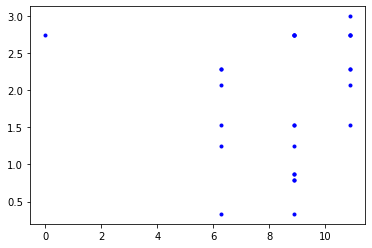

In [18]:
from numba import jit
import numpy as np
import math
# import  zeros, rint, cos, sin, ones, pi


#@jit(nopython=True, cache=True)
# @jit
def calcsofk(rx, ry, rz, nmax):

    N = rx.size

    cp = np.zeros((3, 2 * nmax + 1, N))
    sp = np.zeros((3, 2 * nmax + 1, N))
    cp[:, nmax, :] = 1.0     # this is the k=0 vector
    # these are the contribution of the first k-vector (1,0,0) and symmetries.
    cp[0, nmax+1, :] = np.cos(2 * np.pi * rx[:])
    cp[1, nmax+1, :] = np.cos(2 * np.pi * ry[:])
    cp[2, nmax+1, :] = np.cos(2 * np.pi * rz[:])
    sp[0, nmax+1, :] = np.sin(2 * np.pi * rx[:])
    sp[1, nmax+1, :] = np.sin(2 * np.pi * ry[:])
    sp[2, nmax+1, :] = np.sin(2 * np.pi * rz[:])
    #
    # for n in range(nmax-1):
    for n in range(nmax):
        m = nmax + 1 + n
        cp[:, m, :] = (cp[:, nmax+1, :] * cp[:, m-1, :] -
                       sp[:, nmax+1, :] * sp[:, m-1, :])
        sp[:, m, :] = (sp[:, nmax+1, :] * cp[:, m-1, :] +
                       cp[:, nmax+1, :] * sp[:, m-1, :])
    for n in range(1, nmax+1):
        mm = nmax-n
        mp = nmax+n
        # print(mp,mm)
        # impose the symmetry of cos and sin along the axes
        cp[:, mm, :] = cp[:, mp, :]
        sp[:, mm, :] = - sp[:, mp, :]

    # these are the sum of cos and sin over particles.
    # indices are along the three directions (nx, ny, nz)
    csum = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)
    ssum = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)

    for k in range(N):
        for nx in range(2 * nmax + 1):
            for ny in range(2 * nmax + 1):
                for nz in range(2 * nmax + 1):
                    csum[nx, ny, nz] += (cp[0, nx, k] * cp[1, ny, k] * cp[2, nz, k] -
                                         cp[0, nx, k] * sp[1, ny, k] * sp[2, nz, k] -
                                         sp[0, nx, k] * sp[1, ny, k] * cp[2, nz, k] +
                                         sp[0, nx, k] * cp[1, ny, k] * sp[2, nz, k])
                    ssum[nx, ny, nz] += (sp[0, nx, k] * cp[1, ny, k] * cp[2, nz, k] -
                                         sp[0, nx, k] * sp[1, ny, k] * sp[2, nz, k] +
                                         cp[0, nx, k] * sp[1, ny, k] * cp[2, nz, k] +
                                         cp[0, nx, k] * cp[1, ny, k] * sp[2, nz, k])
 
    sofk = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)
    sofk = (csum**2 + ssum**2) / N
    return sofk
    #return (csum**2 + ssum**2) / N

if __name__ == '__main__':

    from matplotlib.pyplot import plot, show
    
    rx = np.asarray([1., 0., 0.1])
    ry = np.asarray([0.1, 1.2, 0.2])
    rz = np.asarray([0.3, 0.2, 1.])
    nmax=1
    
    sofk=calcsofk(rx,ry,rz,nmax)
    nvec = (2*nmax+1)**3
    kmod = np.zeros(nvec)
    kvec = np.zeros((3,nvec))
    sofk_kvec = np.zeros(nvec)
    ix=-1
    for nx in range(2 * nmax + 1):
        for ny in range(2 * nmax + 1):
            for nz in range(2 * nmax + 1):
                ix += 1
                kmod[ix] = 2*np.pi * np.sqrt((nx-nmax)**2+(ny-nmax)**2+(nz-nmax)**2)
                kvec[0,ix] = 2 * np.pi * (nx-nmax)
                kvec[1,ix] = 2 * np.pi * (ny-nmax)
                kvec[2,ix] = 2 * np.pi * (nz-nmax)
                sofk_kvec[ix] = sofk[nx-nmax,ny-nmax,nz-nmax]
                print(ix,kmod[ix],sofk_kvec[ix])
                 
    plot(kmod,sofk_kvec,'b.')
    show()
    sout=np.column_stack( (kmod,kvec[0,:],kvec[1,:],kvec[2,:],sofk_kvec) )
    np.savetxt('sofk.dat',sout, fmt=('%12.7g','%12.7g','%12.7g','%12.7g','%12.7g'), header="    '|k|'  'kx' 'ky' 'kz' 'S(k)'")
    
#    print('Sk:', calcsofk(rx, ry, rz, 4))

In [4]:
sofk.shape

(11, 11, 11)